<a href="https://colab.research.google.com/github/DanileRond/ARAP/blob/main/GridWorld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Colab Notebook created for ARAP module at UPC ETSETB.

Authors: Juan José Nieto, Josep Vidal, Margarita Cabrera-Bean

# GRID WORLD

## Complete the TODOs you'll find:


1.  Initiate the variable POLICY p(s'|a,s).
2.  Initiate the corresponding rewards in *next_position* function.
3.  Compute the reward vector and the transition probability matrix.
4.  Compute Bellman Equation
-------------------------------------------------
5.  Compute update of the state value
6.  Program Policy Iteration Algorithm
7.  Program Value Iteration Algorithm






In [ ]:
import numpy as np
import seaborn as sns

from random import random
import matplotlib.pyplot as plt

In [ ]:
class Grid():
    def __init__(self):
        self.N_ROWS = 5
        self.N_COLUMNS = 5
        self.N_STATES = self.N_ROWS * self.N_COLUMNS

        self.GAMMA = 0.9
        self.ZETA_MAX = 1e-3
        self.ITER_MAX = 300
        
        self.ACTIONS = [(0, -1), (1, 0), (0, 1), (-1, 0)]
        self.N_ACTIONS = 4
        
        # 1.TODO: Initialize with equal probability for each action in each state
        self.POLICY = np.full(fill_value = 1. / self.N_ACTIONS, shape = (self.N_STATES, self.N_ACTIONS))
        

        self.SPC_STATES = [(6, 10, 10), (16, 18, 5)] # (ini state, fin state, reward)

        self.TrPrM = np.zeros((self.N_STATES, self.N_STATES))
        self.V_FUNCTION = np.zeros(self.N_STATES)
        self.REWARD = np.zeros(self.N_STATES)


    ''' Convert state s from scalar to coordinates x,y '''
    def get_XY(self, state):
        state -= 1
        return (state % self.N_ROWS, int(state / self.N_ROWS))

    ''' Convert coordinates x,y to scalar state '''
    def get_state(self, state):
        return state[1]*self.N_COLUMNS + state[0] + 1


    '''
    Check if state is special

    Params:
        - int: state [1,...,25]
    Returns:
        - bool: is_special
        - int: next_state
        - int: reward
    '''
    def is_special(self, state):
        for spc in self.SPC_STATES:
            if spc[0] == state:
                return True, spc[1], spc[2]
        return False, None, None



    '''
    Computes next state and reward

    Params:
        - int: state [1,...,25]
    Returns:
        - int: next_state
        - int: reward
    '''
    def next_position(self, state, action):
        (x,y) = self.get_XY(state)
        (ax, ay) = self.ACTIONS[action]

        next_state = (x + ax, y + ay)

        special = self.is_special(state)    # returns (is_special, next_state, reward)

        # 2.TODO: Complete the TODOs with the corresponding rewards
        if special[0]:                                                  # special state
            return special[1], special[2]

        elif next_state[0] > -1 and next_state[0] < self.N_ROWS and \
            next_state[1] > -1 and next_state[1] < self.N_COLUMNS:      # agent within the limits of the grid

            next_state = self.get_state(next_state)
            return next_state, 0

        else:                                                           # agent is trying to overpass the limits of the grid
            return state, -1


### Plot functions

In [ ]:
'''Insert title, and axis labels to plots'''
def insert_labels(labels, ax):
    if 'title' in labels:
        ax.set_title(labels['title']) 
    if 'xlabel' in labels:
        ax.set_xlabel(labels['xlabel']) 
    if 'ylabel' in labels:
	    ax.set_ylabel(labels['ylabel'])


'''Plot for showing value functions'''
def plot_heatmap(data, **kwargs):
    fig, ax = plt.subplots()
    sns.heatmap(data, cmap='coolwarm')
    insert_labels(kwargs, ax)

'''Plot for showing how the difference of state-values decrease over time'''
def plot_deltas(data, **kwargs):
    fig, ax = plt.subplots()
    plt.plot(data)
    insert_labels(kwargs, ax)

'''Policy plots. Indicates action taken in each state.'''
def plot_arrow(data, actions, **kwargs):

    fig, ax = plt.subplots()

    U = np.array([[actions[y][0] for y in x] for x in data])
    V = np.array([[actions[y][1] for y in x] for x in data])

    X = np.arange(0, 5, 1)
    Y = np.arange(0, 5, 1)

    q = ax.quiver(X, Y, V, U*-1)
    plt.imshow(data, cmap=plt.cm.Pastel1)
    # ax.quiverkey(q, X=0.3, Y=1.1, U=10, label=' ', labelpos='E')

    insert_labels(kwargs, ax)
    ax.axis('off')
    plt.show()


'''Group of N policy plots.'''
def plot_arrows(data, actions):
    # Only pick 3 first actions matrices and last one (optimal policy)
    num_policies = len(data)

    fdata = data[:min(3, num_policies)] + data[-1:]
    

    fig, ax = plt.subplots(1, len(fdata), figsize=(20,6))
    for i, d in enumerate(fdata):

        U = np.array([[actions[y][0] for y in x] for x in d])
        V = np.array([[actions[y][1] for y in x] for x in d])

        X = np.arange(0, 5, 1)
        Y = np.arange(0, 5, 1)

        q = ax[i].quiver(X, Y, V, U*-1)
        ax[i].imshow(d, cmap=plt.cm.Pastel1)
        # ax[i].quiverkey(q, X=0.3, Y=1.1, U=10,
        #             label=' ', labelpos='E')
        labels = {
            'title': '{} Policy'.format(i if len(fdata)-1 > i else 'Optimal'),
        }
        insert_labels(labels, ax[i])
        ax[i].axis('off')

    plt.show()

## TRANSITION PROBABILITY MATRIX AND UNIFORM POLICY VALUE FUNCTION

In [ ]:
grid = Grid()

for s in range(1, grid.N_STATES + 1):
    for a in range(grid.N_ACTIONS):
        
        next_state, reward = grid.next_position(s, a)
        # 3.TODO: Compute reward vector and transition prob matrix. 
        grid.TrPrM[s-1, next_state-1] += grid.POLICY[next_state - 1,a] #next_state
        grid.REWARD[s-1] += reward*grid.POLICY[s - 1,a]

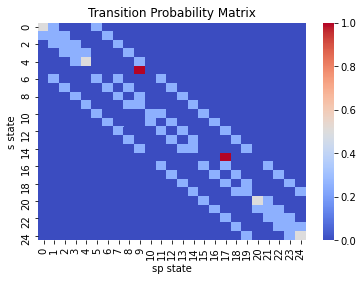

In [ ]:
# PLOT TRANSITION MATRIX
conf = {
    'title': 'Transition Probability Matrix',
    'xlabel': 'sp state',
    'ylabel': 's state'
}
plot_heatmap(grid.TrPrM, **conf)



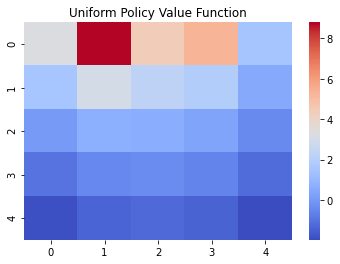

In [ ]:
# UNIFORM POLICY VALUE FUNCTION COMPUTATION

# 4.TODO: Compute Bellman Equation

value_f = np.dot(np.linalg.inv(np.identity(grid.N_STATES) - grid.GAMMA * grid.TrPrM), grid.REWARD)


vf_matrix = np.transpose(np.reshape(value_f, (grid.N_ROWS, grid.N_COLUMNS)))

# PLOT UNIFORM POLICY VALUE F.
conf = {
    'title': 'Uniform Policy Value Function',
}
plot_heatmap(vf_matrix, **conf)

## POLICY EVALUATION

In [ ]:
'''
In this case we define a function since we will use this algorithm
within 'policy iteration' algorithm
'''
def policy_evaluation(grid):
    
    zeta = grid.ZETA_MAX + 1
    iter = 0
    v_incr = []

    while zeta > grid.ZETA_MAX and iter < grid.ITER_MAX + 1:
        
        vm_aux = grid.V_FUNCTION.copy()                                 # Store current state-values for later comparison

        for s in range(1, grid.N_STATES + 1):                           # Loop over all the states
            vs_aux = 0
            for a in range(grid.N_ACTIONS):                             # Loop over all actions in each state
                next_state, reward = grid.next_position(s, a)           # Compute next_state and reward when taking action a in state s
          
                # 5.TODO: Compute update of the state value
                vs_aux += (reward + grid.GAMMA*grid.V_FUNCTION[next_state-1])*grid.POLICY[s-1,a]
                
        
            grid.V_FUNCTION[s - 1] = vs_aux                             # Update state-value with the result of Bellman Equation
        
        zeta = np.max(np.abs(grid.V_FUNCTION - vm_aux))                 # Compute the difference between current state-values and previous ones
        v_incr.append(zeta)
        iter += 1
    
    return v_incr

In [ ]:
grid = Grid()
v_incr = policy_evaluation(grid)

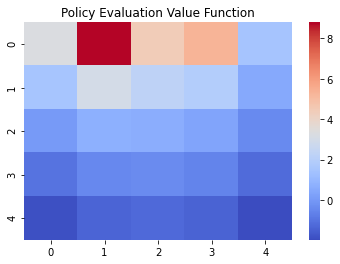

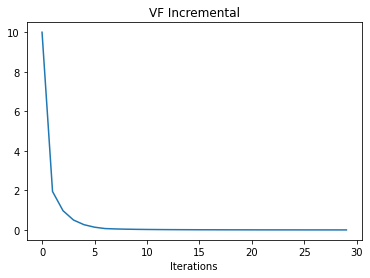

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Policy Evaluation Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': 'VF Incremental',
    'xlabel': 'Iterations'
}
plot_deltas(v_incr, **conf)


In [ ]:
# Obtenemos la misma Value Function

## POLICY ITERATION

In [ ]:
grid = Grid()

iter = 0
it_max = 10
ac_dif = 1

actions_list = []       # Store actions taken in each state for each run. [[a1, ... , a25], ... , [a1, ... , a25]]
a_inc = []              # Store number of different actions taken in each run.


while ac_dif > 0 and iter < it_max + 1:
    ac_dif = 0
    actions = []
    
  

    # 6.TODO: Program Policy Iteration Algorithm (you must make use of policy_evaluation function)
            
    
    policy_evaluation(grid)
    
    
   

        

    for s in range(1,grid.N_STATES+1):

        chosen_a = np.argmax(grid.POLICY[s-1])
        
        A = np.zeros(grid.N_ACTIONS)
        for a in range(grid.N_ACTIONS):
            next_state, reward = grid.next_position(s, a)
            A[a] += (reward + grid.GAMMA*grid.V_FUNCTION[next_state-1])
          
        
        
        
        best_a = np.argmax(A)
        
        actions.append(best_a)
             
        # Greedily update the policy
        if chosen_a != best_a:
          ac_dif+=1
        grid.POLICY[s-1] = np.eye(grid.N_ACTIONS)[best_a]
   
            
          
    
    actions_list.append(np.transpose(np.array(actions).reshape(grid.N_ROWS,grid.N_COLUMNS)))

    
    a_inc.append(ac_dif)

    iter += 1

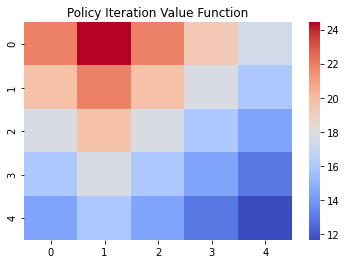

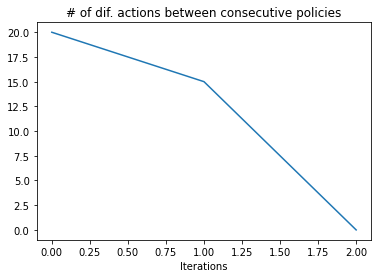

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Policy Iteration Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': '# of dif. actions between consecutive policies',
    'xlabel': 'Iterations'
}
plot_deltas(a_inc, **conf)



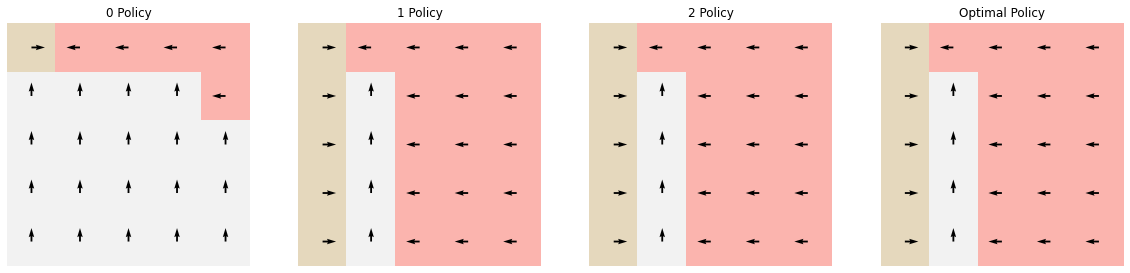

In [ ]:
plot_arrows(actions_list, grid.ACTIONS)

## VALUE ITERATION

In [ ]:

grid = Grid()
zeta = grid.ZETA_MAX + 1
iter = 0
v_incr = []
a_inc = []

while zeta > grid.ZETA_MAX and iter < grid.ITER_MAX + 1:
    ac_dif = 0
    vm_aux = grid.V_FUNCTION.copy()

    for s in range(1, grid.N_STATES + 1):                           # Loop over all the states
            A = np.zeros(grid.N_ACTIONS)
            for a in range(grid.N_ACTIONS):                             # Loop over all actions in each state
                next_state, reward = grid.next_position(s, a)           # Compute next_state and reward when taking action a in state s
                A[a] += (reward + grid.GAMMA*grid.V_FUNCTION[next_state-1])
                
               
                
        
            grid.V_FUNCTION[s - 1] = np.max(A)
    zeta = np.max(np.abs(grid.V_FUNCTION - vm_aux))     
    v_incr.append(zeta)                                 
    iter += 1
    

    
for s in range(1,grid.N_STATES+1):


        chosen_a = np.argmax(grid.POLICY[s-1])
            
        A = np.zeros(grid.N_ACTIONS)
        for a in range(grid.N_ACTIONS):
            next_state, reward = grid.next_position(s, a)
            A[a] += (reward + grid.GAMMA*grid.V_FUNCTION[next_state-1])
        best_a = np.argmax(A)
            

        if chosen_a != best_a:
          ac_dif+=1
        grid.POLICY[s-1,best_a] = 1.0

a_inc.append(ac_dif)                                # Number of actions taken differently from previous iteration
    


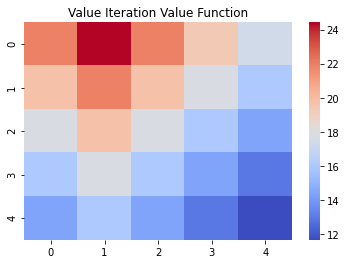

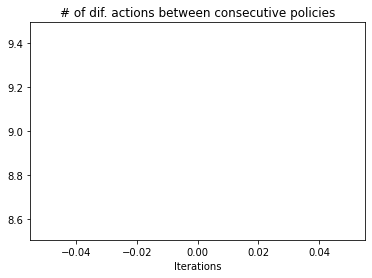

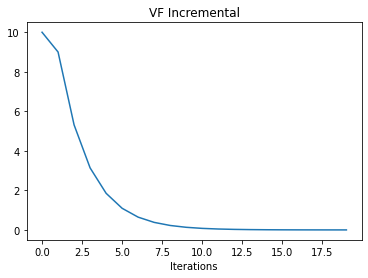

In [ ]:
vf_matrix = np.transpose(np.reshape(grid.V_FUNCTION, (grid.N_ROWS, grid.N_COLUMNS)))

conf = {
    'title': 'Value Iteration Value Function',
}
plot_heatmap(vf_matrix, **conf)


conf= {
    'title': '# of dif. actions between consecutive policies',
    'xlabel': 'Iterations'
}
plot_deltas(a_inc, **conf)

conf= {
    'title': 'VF Incremental',
    'xlabel': 'Iterations'
}
plot_deltas(v_incr, **conf)


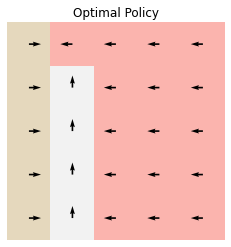

In [ ]:
conf= {
    'title': 'Optimal Policy'
}

actions = []
for s in range(1, grid.N_STATES + 1):
    actions.append(np.argmax(grid.POLICY[s-1]))

action_arrows = np.transpose(np.array(actions).reshape(grid.N_ROWS,grid.N_COLUMNS))
plot_arrow(action_arrows, grid.ACTIONS, **conf)

En Policy Iteration, podemos ver que el Policy improvement converge en  2 iteraciones. Además, la value function converge en unas 5 iteraciones. Como resolver la ecuación de Bellman puede ser costoso, utilizamos una estimación de esta.

En el value iteration podemos ver que usamos mas iteraciones para encontrar la Value function(unas 10). Con los dos métodos hemos obtenido la misma Optimal policy en un número similar de iteraciones.

